In [32]:
import os
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [33]:
working_dir = os.getcwd()

train_data = pd.read_csv(f'{working_dir}/../data/TrainData.csv')
X_train = train_data['WS10'].values.reshape(-1, 1)  # Wind speed at 10m above ground level
y_train = train_data['POWER'].values               # Normalized power values

In [35]:
svr_model = SVR(kernel='rbf', C=1, gamma='scale')
svr_model.fit(X_train, y_train)

SVR(C=1)

In [36]:
# Read the solution file
solution_data = pd.read_csv(f'{working_dir}/../data/Solution.csv')

# Extract the true wind power values
y_true = solution_data['POWER'].values.reshape(-1, 1)

In [37]:
# Read the weather forecast file
weather_forecast = pd.read_csv(f"{working_dir}/../data/WeatherForecastInput.csv")

# Extract the wind speed values
X_to_predict = weather_forecast["WS10"].values.reshape(-1, 1)

In [38]:
# Predict
y_pred = svr_model.predict(X_to_predict)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"RMSE for SVR: {rmse}")

RMSE for SVR: 0.213743597465898


In [39]:
# Write to file
forecast_template = pd.read_csv(f'{working_dir}/../data/ForecastTemplate.csv')
forecast_template['FORECAST'] = y_pred
forecast_template.to_csv(f'{working_dir}/results/ForecastTemplate1-SVR.csv', index=False)

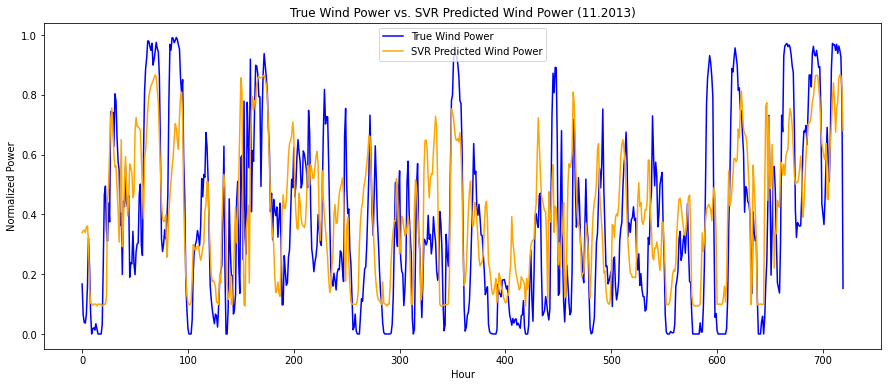

In [40]:
# Plot figure
plt.figure(figsize=(15, 6))
plt.plot(y_true, label='True Wind Power', color='blue')
plt.plot(y_pred, label='SVR Predicted Wind Power', color='orange')
plt.legend()
plt.title('True Wind Power vs. SVR Predicted Wind Power (11.2013)')
plt.xlabel('Hour')
plt.ylabel('Normalized Power')
plt.show()